In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [3]:
IMG_SIZE=256
BATCH_SIZE=32
CHANNELS = 3

In [4]:
class_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [7]:
testing_dataset=dataset.skip(54)
len(testing_dataset)

14

In [8]:
validation=testing_dataset.take(6)
len(validation)

6

In [9]:
##training dataset is 80% testing dataset is 20% out of which 10% is for validation 
training_dataset=dataset.take(54)
len(training_dataset)

54

In [10]:
testing_dataset=testing_dataset.skip(6)
len(testing_dataset)

8

In [11]:
tr_ds=training_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds=validation.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
ts_ds=testing_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [13]:
augementation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [14]:
equale_Size=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMG_SIZE,IMG_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [15]:
input_shape = (IMG_SIZE, IMG_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)       

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    tr_ds,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=validation_ds
)

Epoch 1/20
54/54 [==============================] - 1502s 26s/step - loss: 1.7068 - accuracy: 0.4925 - val_loss: 0.8564 - val_accuracy: 0.4844
Epoch 2/20
54/54 [==============================] - 329s 6s/step - loss: 0.7413 - accuracy: 0.6372 - val_loss: 0.5755 - val_accuracy: 0.8073
Epoch 3/20
54/54 [==============================] - 421s 8s/step - loss: 0.4321 - accuracy: 0.8090 - val_loss: 0.2820 - val_accuracy: 0.8802
Epoch 4/20
54/54 [==============================] - 520s 10s/step - loss: 0.3074 - accuracy: 0.8843 - val_loss: 0.2546 - val_accuracy: 0.8906
Epoch 5/20
54/54 [==============================] - 459s 9s/step - loss: 0.2859 - accuracy: 0.8889 - val_loss: 0.2675 - val_accuracy: 0.8698
Epoch 6/20
54/54 [==============================] - 434s 8s/step - loss: 0.1671 - accuracy: 0.9288 - val_loss: 0.1544 - val_accuracy: 0.9479
Epoch 7/20
54/54 [==============================] - 398s 7s/step - loss: 0.1916 - accuracy: 0.9282 - val_loss: 0.1309 - val_accuracy: 0.9583
Epoch 8/20

In [24]:
scores = model.evaluate(ts_ds)

8/8 [==============================] - 15s 2s/step - loss: 0.1933 - accuracy: 0.9440


In [25]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [26]:
import numpy as np


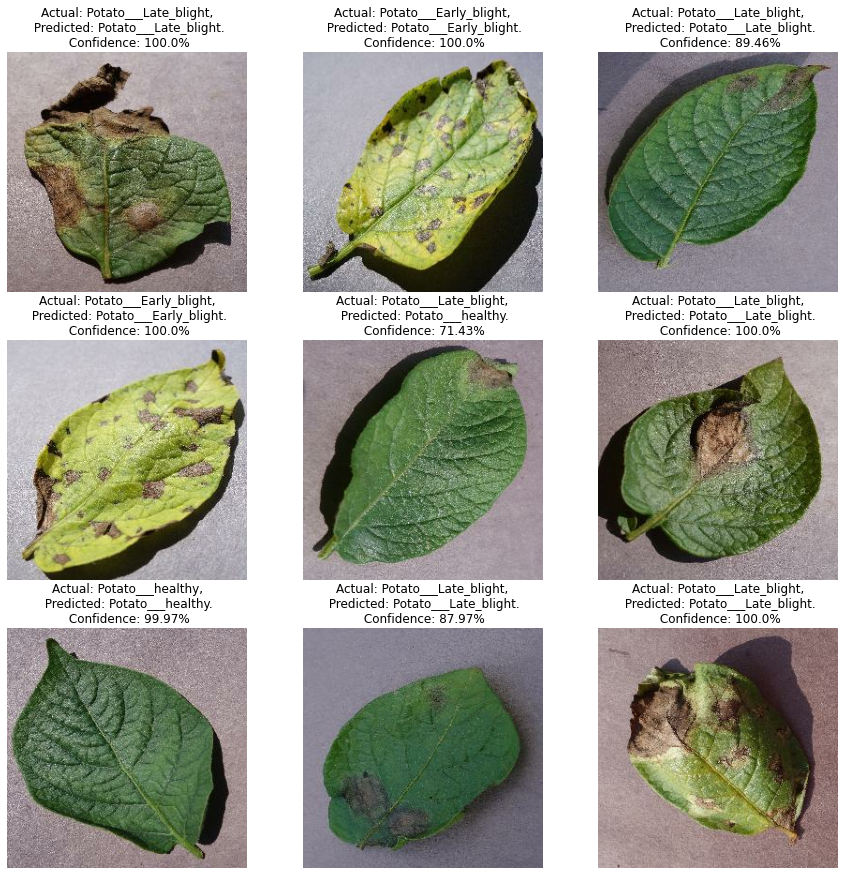

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in ts_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [28]:
model.save("../models/1")

INFO:tensorflow:Assets written to: ../models/1\assets


In [1]:
model.save("../potatoes.h5")

NameError: name 'model' is not defined